In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
data = pd.read_csv('framingham.csv')

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [5]:
data.shape

(4240, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


# Data Preprocessing

In [10]:
data = data.rename(columns = {'currentSmoker': 'current_smoker', 'cigsPerDay': 'cigs_per_day', 'BPMeds': 'BP_meds', 
                             'prevalentStroke': 'prevalent_stroke', 'prevalentHyp' : 'prevalent_hyp', 
                             'totChol': 'total_cholesterol', 'sysBP': 'sys_BP', 'diaBP':'dia_BP', 'heartRate':'heart_rate',
                             'TenYearCHD': 'ten_year_CHD'})

In [11]:
data.head(2)

,male,age,education,current_smoker,cigs_per_day,BP_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,sys_BP,dia_BP,BMI,heart_rate,glucose,ten_year_CHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [12]:
data.drop('education', axis =1, inplace = True)

In [13]:
data.shape

(4240, 15)

In [14]:
data.isnull().sum()

male                   0
age                    0
current_smoker         0
cigs_per_day          29
BP_meds               53
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     50
sys_BP                 0
dia_BP                 0
BMI                   19
heart_rate             1
glucose              388
ten_year_CHD           0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               4240 non-null   int64  
 1   age                4240 non-null   int64  
 2   current_smoker     4240 non-null   int64  
 3   cigs_per_day       4211 non-null   float64
 4   BP_meds            4187 non-null   float64
 5   prevalent_stroke   4240 non-null   int64  
 6   prevalent_hyp      4240 non-null   int64  
 7   diabetes           4240 non-null   int64  
 8   total_cholesterol  4190 non-null   float64
 9   sys_BP             4240 non-null   float64
 10  dia_BP             4240 non-null   float64
 11  BMI                4221 non-null   float64
 12  heart_rate         4239 non-null   float64
 13  glucose            3852 non-null   float64
 14  ten_year_CHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [16]:
data['cigs_per_day'].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [17]:
df = data

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

male                 0
age                  0
current_smoker       0
cigs_per_day         0
BP_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
sys_BP               0
dia_BP               0
BMI                  0
heart_rate           0
glucose              0
ten_year_CHD         0
dtype: int64

In [20]:
df.shape

(3751, 15)

In [21]:
((4240-3751)/4240)*100

11.533018867924529

In [22]:
df.duplicated().sum()

0

In [23]:
X = df.drop('ten_year_CHD', axis=1)
y = df['ten_year_CHD']

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
smote=SMOTE(sampling_strategy='minority') 
x,y=smote.fit_resample(X,y)
y.value_counts()

ten_year_CHD
0    3179
1    3179
Name: count, dtype: int64

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Exploratory Data Analysis

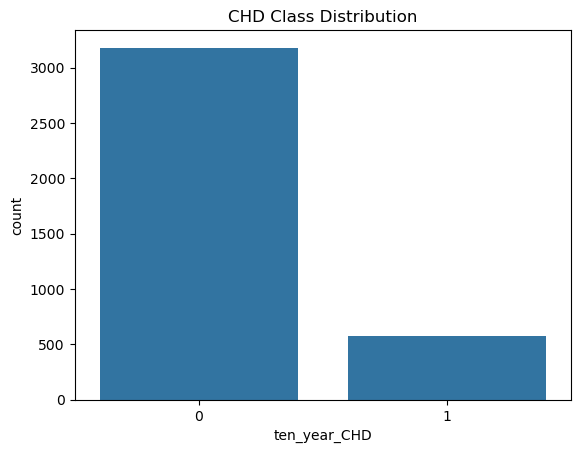

In [49]:
sns.countplot(x='ten_year_CHD', data=df)
plt.title('CHD Class Distribution')
plt.show()

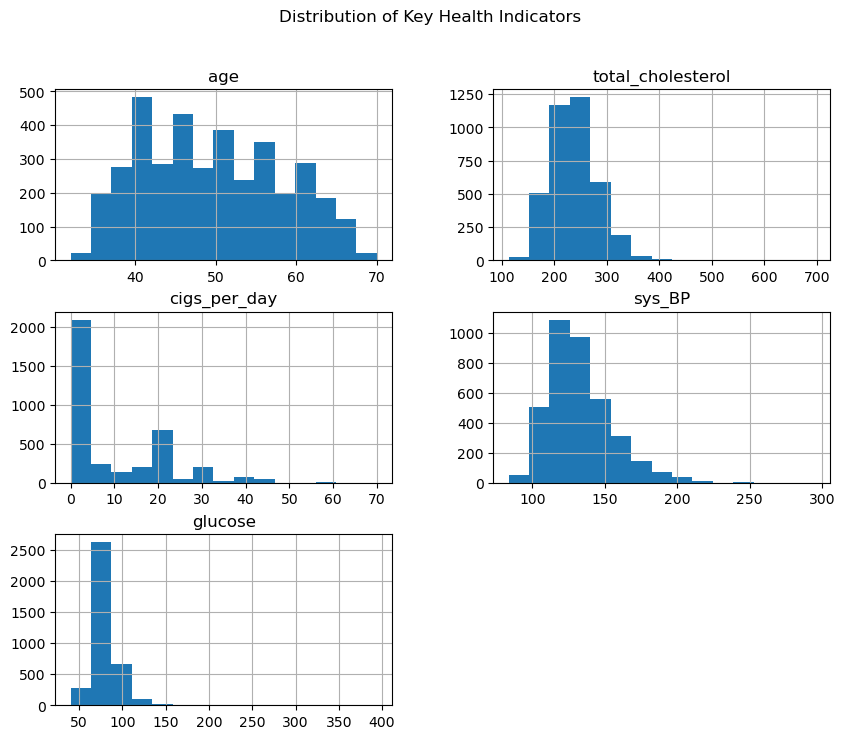

In [53]:
df[['age', 'total_cholesterol', 'cigs_per_day', 'sys_BP', 'glucose']].hist(bins=15, figsize=(10, 8))
plt.suptitle('Distribution of Key Health Indicators')
plt.show()

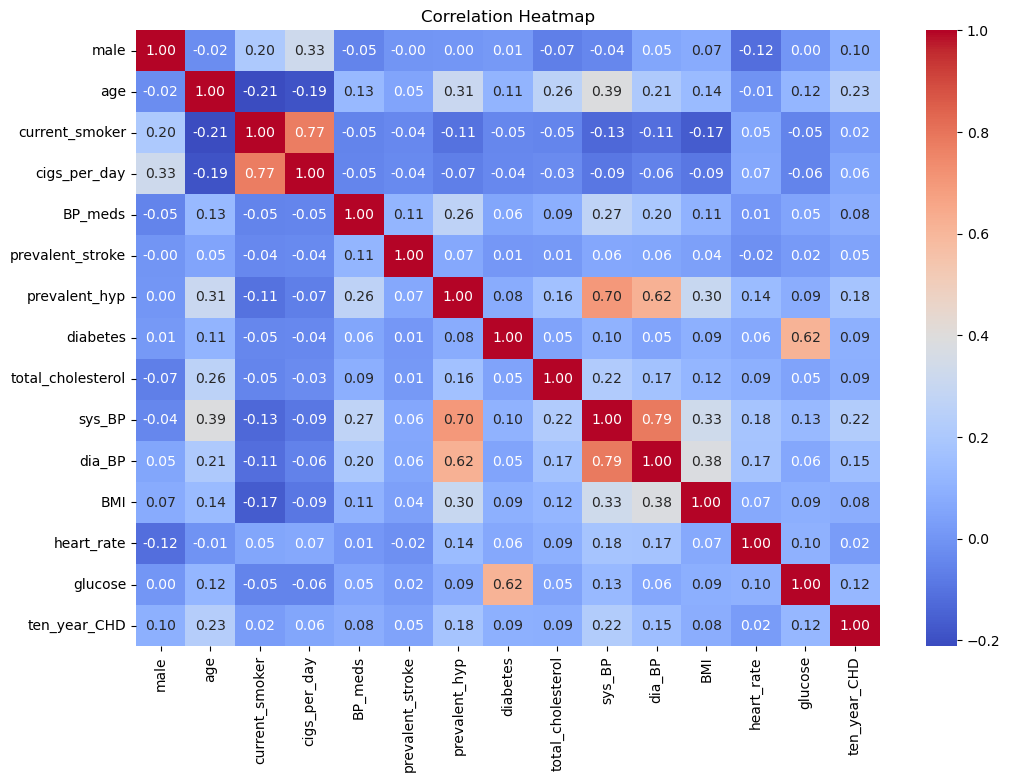

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Model Training using Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay

In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [63]:
from sklearn.metrics import log_loss

y_proba = model.predict_proba(X_train)[:, 1]
loss = log_loss(y_train, y_proba)
print("Binary Cross-Entropy Loss:", loss)


Binary Cross-Entropy Loss: 0.5896601289936323


In [65]:
x_pred = model.predict(X_train)
x_proba = model.predict_proba(X_train)[:, 1]

In [67]:
print("Accuracy:", accuracy_score(y_train, x_pred))
print("Precision:", precision_score(y_train, x_pred))
print("Recall:", recall_score(y_train, x_pred))
print("F1 Score:", f1_score(y_train, x_pred))
print("ROC-AUC:", roc_auc_score(y_train, x_proba))

Accuracy: 0.6950561797752809
Precision: 0.6913907284768211
Recall: 0.704136690647482
F1 Score: 0.697705502339051
ROC-AUC: 0.7550743098243777


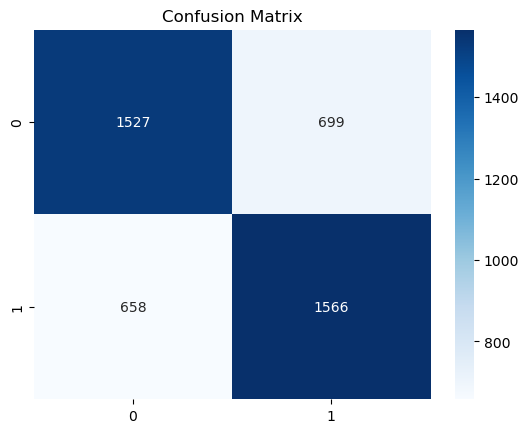

In [69]:
sns.heatmap(confusion_matrix(y_train, x_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

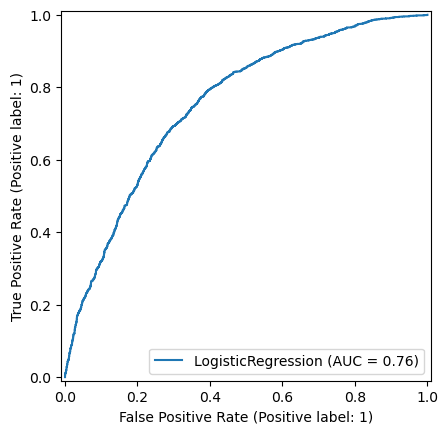

In [71]:
RocCurveDisplay.from_estimator(model, X_train, y_train)
plt.show()

# Model Evaluation and Prediction

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay

In [75]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [77]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.6855345911949685
Precision: 0.6813074565883555
Recall: 0.6984293193717277
F1 Score: 0.6897621509824199
ROC-AUC: 0.743409349367937


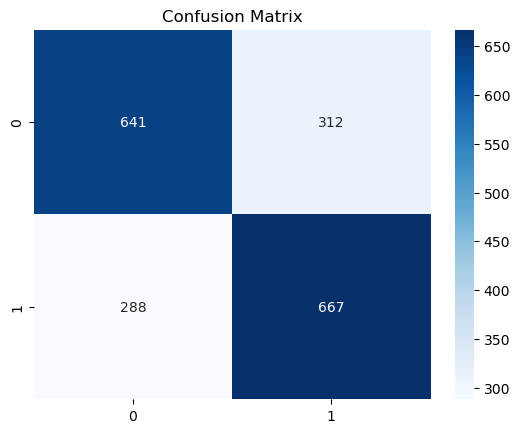

In [79]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

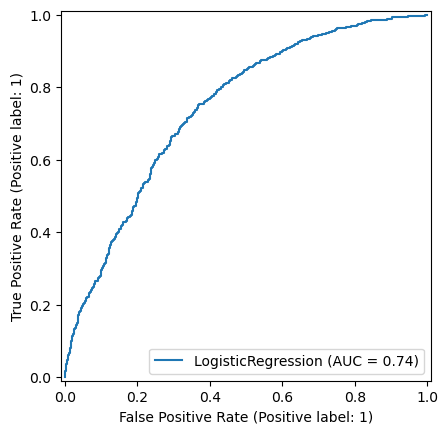

In [81]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

# XGBoost model

In [83]:
from xgboost import XGBClassifier

In [85]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')
xgb_model.fit(X_train, y_train)

C:\Users\Bhamini\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:00:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [87]:
xgb_probs1 = xgb_model.predict_proba(X_train)[:, 1]  # Probabilities for ROC AUC
xgb_preds1 = xgb_model.predict(X_train)  # Class predictions

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [91]:
xgb_fpr, xgb_tpr, _ = roc_curve(y_train, xgb_probs1)
xgb_auc = roc_auc_score(y_train, xgb_probs1)

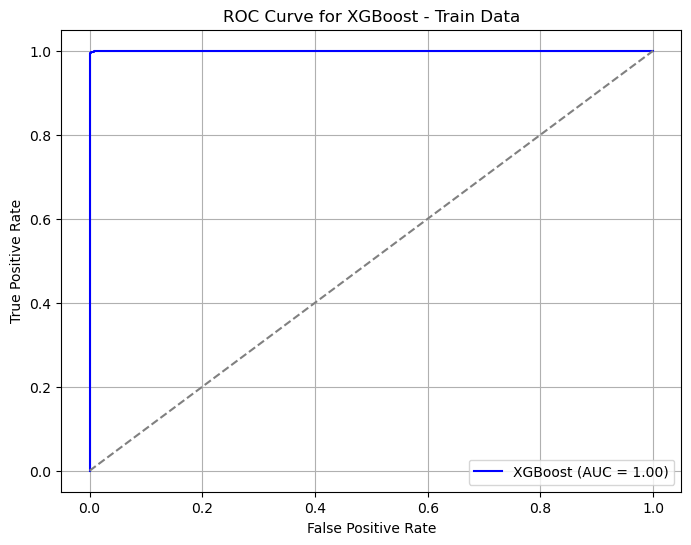

In [93]:
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost - Train Data')
plt.legend()
plt.grid()

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

In [97]:
print("XGBoost ROC AUC Score:", roc_auc_score(y_train, xgb_probs1))
print("XGBoost Classification Report:\n", classification_report(y_train, xgb_preds1))

XGBoost ROC AUC Score: 0.9999402095574215
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2226
           1       1.00      0.99      1.00      2224

    accuracy                           1.00      4450
   macro avg       1.00      1.00      1.00      4450
weighted avg       1.00      1.00      1.00      4450



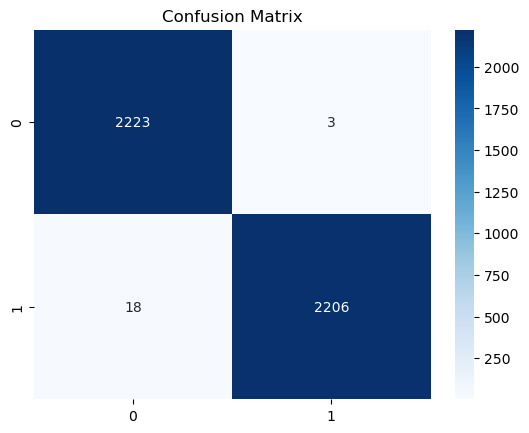

In [99]:
sns.heatmap(confusion_matrix(y_train, xgb_preds1), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [101]:
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC
xgb_preds = xgb_model.predict(X_test)  # Class predictions

In [103]:
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, xgb_probs))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_preds))

XGBoost ROC AUC Score: 0.9381440806930992
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       953
           1       0.90      0.85      0.87       955

    accuracy                           0.87      1908
   macro avg       0.88      0.87      0.87      1908
weighted avg       0.88      0.87      0.87      1908



In [105]:
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

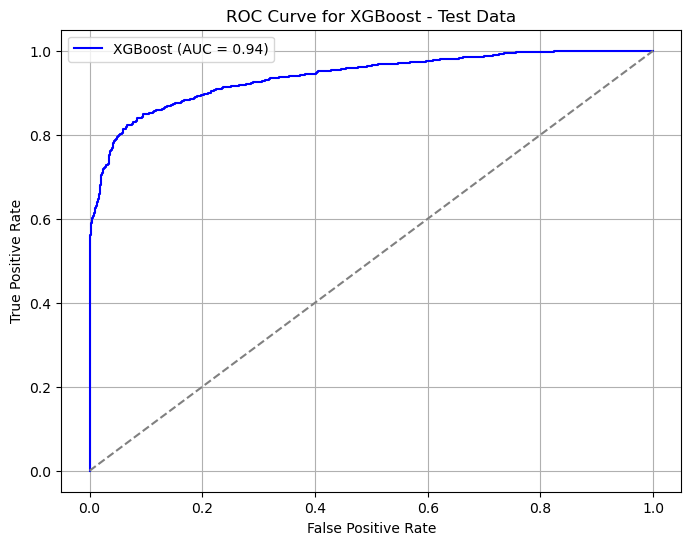

In [107]:
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost - Test Data')
plt.legend()
plt.grid()

# Alternative missing values treatment

In [109]:
a = data['cigs_per_day'].median()

In [111]:
data.head(2)

,male,age,current_smoker,cigs_per_day,BP_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,sys_BP,dia_BP,BMI,heart_rate,glucose,ten_year_CHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [113]:
data.shape

(4240, 15)

In [115]:
data["cigs_per_day"] = data["cigs_per_day"].fillna(a)

In [117]:
data['cigs_per_day'].isnull().sum()

0

In [119]:
b = data['BP_meds'].median()

In [121]:
data["BP_meds"] = data["BP_meds"].fillna(b)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               4240 non-null   int64  
 1   age                4240 non-null   int64  
 2   current_smoker     4240 non-null   int64  
 3   cigs_per_day       4240 non-null   float64
 4   BP_meds            4240 non-null   float64
 5   prevalent_stroke   4240 non-null   int64  
 6   prevalent_hyp      4240 non-null   int64  
 7   diabetes           4240 non-null   int64  
 8   total_cholesterol  4190 non-null   float64
 9   sys_BP             4240 non-null   float64
 10  dia_BP             4240 non-null   float64
 11  BMI                4221 non-null   float64
 12  heart_rate         4239 non-null   float64
 13  glucose            3852 non-null   float64
 14  ten_year_CHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [125]:
data['total_cholesterol'].unique()

array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
       294., 332., 226., 221., 232., 291., 190., 185., 234., 215., 270.,
       272., 295., 209., 175., 214., 257., 178., 233., 180., 243., 237.,
        nan, 311., 208., 252., 261., 179., 194., 267., 216., 240., 266.,
       255., 220., 235., 212., 223., 300., 302., 248., 200., 189., 258.,
       202., 213., 183., 274., 170., 210., 197., 326., 188., 256., 244.,
       193., 239., 296., 269., 275., 268., 265., 173., 273., 290., 278.,
       264., 282., 241., 288., 222., 303., 246., 150., 187., 286., 154.,
       279., 293., 259., 219., 230., 320., 312., 165., 159., 174., 242.,
       301., 167., 308., 325., 229., 236., 224., 253., 464., 171., 186.,
       227., 249., 176., 163., 191., 263., 196., 310., 164., 135., 238.,
       207., 342., 287., 182., 352., 284., 217., 203., 262., 129., 155.,
       323., 206., 283., 319., 304., 340., 328., 280., 368., 218., 276.,
       339., 231., 198., 177., 201., 277., 184., 19

In [127]:
data['total_cholesterol'] = data['total_cholesterol'].replace('c', np.nan)

In [129]:
data['total_cholesterol'].unique()

array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
       294., 332., 226., 221., 232., 291., 190., 185., 234., 215., 270.,
       272., 295., 209., 175., 214., 257., 178., 233., 180., 243., 237.,
        nan, 311., 208., 252., 261., 179., 194., 267., 216., 240., 266.,
       255., 220., 235., 212., 223., 300., 302., 248., 200., 189., 258.,
       202., 213., 183., 274., 170., 210., 197., 326., 188., 256., 244.,
       193., 239., 296., 269., 275., 268., 265., 173., 273., 290., 278.,
       264., 282., 241., 288., 222., 303., 246., 150., 187., 286., 154.,
       279., 293., 259., 219., 230., 320., 312., 165., 159., 174., 242.,
       301., 167., 308., 325., 229., 236., 224., 253., 464., 171., 186.,
       227., 249., 176., 163., 191., 263., 196., 310., 164., 135., 238.,
       207., 342., 287., 182., 352., 284., 217., 203., 262., 129., 155.,
       323., 206., 283., 319., 304., 340., 328., 280., 368., 218., 276.,
       339., 231., 198., 177., 201., 277., 184., 19

In [131]:
c = round(data['total_cholesterol'].mean(),1)

In [133]:
data['total_cholesterol'] = data['total_cholesterol'].fillna(c)

In [135]:
data['total_cholesterol'] = data['total_cholesterol'].astype('float')

In [137]:
d = data['BMI'].mean()

In [139]:
data['BMI'] = data['BMI'].fillna(d)

In [141]:
e = data['glucose'].median()

In [143]:
data['glucose'] = data['glucose'].fillna(e)

In [151]:
data.isnull().sum()

male                 0
age                  0
current_smoker       0
cigs_per_day         0
BP_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
sys_BP               0
dia_BP               0
BMI                  0
heart_rate           0
glucose              0
ten_year_CHD         0
dtype: int64

In [147]:
f = data['heart_rate'].median()

In [149]:
data['heart_rate'] = data['heart_rate'].fillna(f)

In [153]:
X = data.drop('ten_year_CHD', axis=1)
y = data['ten_year_CHD']

In [155]:
X.shape

(4240, 14)

In [157]:
data.duplicated().sum()

0

# Applying Logistic Regression on new dataset

In [159]:
from imblearn.over_sampling import SMOTE

In [161]:
smote=SMOTE(sampling_strategy='minority') 
x,y=smote.fit_resample(X,y)
y.value_counts()

ten_year_CHD
0    3596
1    3596
Name: count, dtype: int64

In [163]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [167]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [169]:
x_pred = model.predict(X_train)
x_proba = model.predict_proba(X_train)[:, 1]

In [171]:
print("Accuracy:", accuracy_score(y_train, x_pred))
print("Precision:", precision_score(y_train, x_pred))
print("Recall:", recall_score(y_train, x_pred))
print("F1 Score:", f1_score(y_train, x_pred))
print("ROC-AUC:", roc_auc_score(y_train, x_proba))

Accuracy: 0.6412395709177592
Precision: 0.6399843811011323
Recall: 0.6496234641300039
F1 Score: 0.6447678992918962
ROC-AUC: 0.7062920770488567


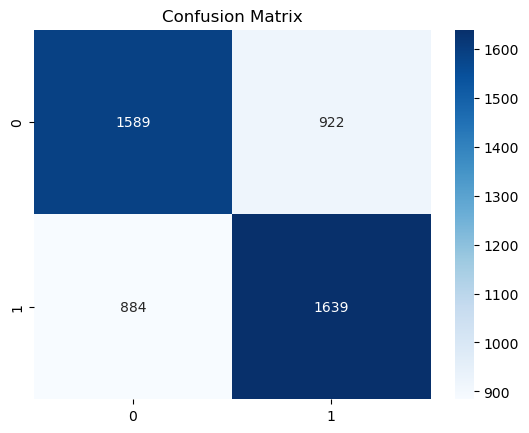

In [173]:
sns.heatmap(confusion_matrix(y_train, x_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

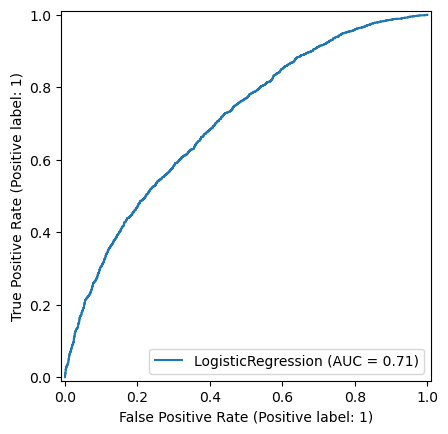

In [183]:
RocCurveDisplay.from_estimator(model, X_train, y_train)
plt.show()

In [175]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [177]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.639017608897127
Precision: 0.6324324324324324
Recall: 0.6542404473438956
F1 Score: 0.6431516262024737
ROC-AUC: 0.6944498606345103


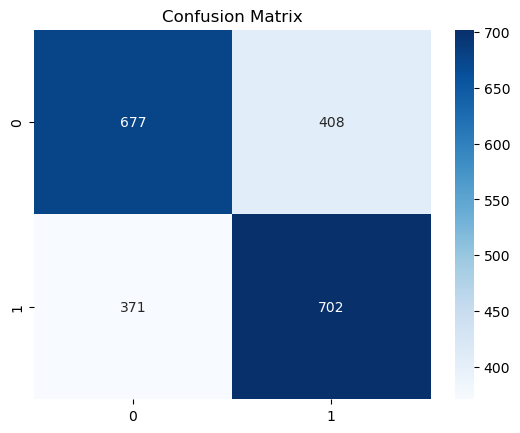

In [179]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

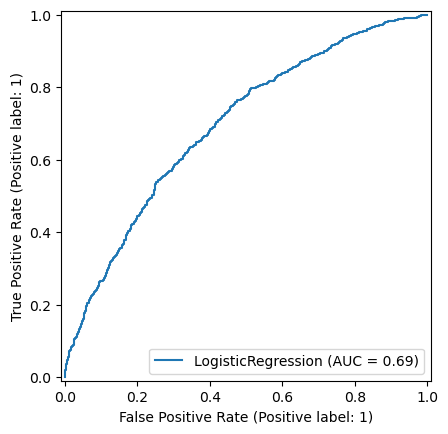

In [181]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [185]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')
xgb_model.fit(X_train, y_train)

C:\Users\Bhamini\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:20:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [187]:
xgb_probs1 = xgb_model.predict_proba(X_train)[:, 1]  # Probabilities for ROC AUC
xgb_preds1 = xgb_model.predict(X_train)  # Class predictions


In [189]:
print("XGBoost ROC AUC Score:", roc_auc_score(y_train, xgb_probs1))
print("XGBoost Classification Report:\n", classification_report(y_train, xgb_preds1))

XGBoost ROC AUC Score: 0.9997501283689854
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2511
           1       1.00      0.99      0.99      2523

    accuracy                           0.99      5034
   macro avg       0.99      0.99      0.99      5034
weighted avg       0.99      0.99      0.99      5034



In [191]:
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC
xgb_preds = xgb_model.predict(X_test)  #

In [193]:
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, xgb_probs))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_preds))

XGBoost ROC AUC Score: 0.9397747819327352
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1085
           1       0.88      0.85      0.86      1073

    accuracy                           0.87      2158
   macro avg       0.87      0.87      0.87      2158
weighted avg       0.87      0.87      0.87      2158

